## Activity: Perform logistic regression ##
## Introduction ##
In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model
* Evaluating a binomial logistic regression model using a confusion matri

In [58]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

### load dataset

In [3]:
data = pd.read_csv("Invistico_Airline.csv")
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
data.shape

(129880, 22)

In [36]:
data['Inflight entertainment']

0         4
1         2
2         0
3         4
4         3
         ..
129875    5
129876    1
129877    2
129878    2
129879    3
Name: Inflight entertainment, Length: 129880, dtype: int64

## Data exploration, data cleaning, and model preparation

## Prepare the data
After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes:

* Exploring the data
* Checking for missing values
* Encoding the data
* Renaming a column
* Creating the training and testing data

In [5]:
#check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Check the number of satisfied customers in the dataset

In [11]:
data['satisfaction'].value_counts().to_frame()

,satisfaction
satisfied,71087
dissatisfied,58793


### Check for missing values

In [12]:
data.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [13]:
#drop missing values
data_sub = data.dropna(axis = 0)

In [16]:
data_sub['Inflight entertainment'].astype(float)

0         4.0
1         2.0
2         0.0
3         4.0
4         3.0
         ... 
129875    5.0
129876    1.0
129877    2.0
129878    2.0
129879    3.0
Name: Inflight entertainment, Length: 129487, dtype: float64

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction'>

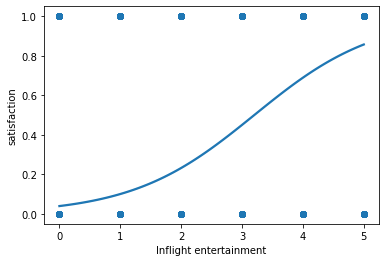

In [26]:
sns.regplot(x= "Inflight entertainment", y = "satisfaction", data = data_sub, logistic = True)

### Convert the categorical column satisfaction into numeric

In [17]:
data_sub.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [70]:
cols =['satisfaction', 'Customer Type', 'Type of Travel', 'Class'] 

In [71]:
# Trasform other categories 
for i in cols:
    data_sub[i]=le.fit_transform(data_sub[i])

C:\Users\philippe\AppData\Local\Temp\ipykernel_19644\170547772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub[i]=le.fit_transform(data_sub[i])


In [72]:
data_sub.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Create the training and testing data

In [73]:
y= data_sub['satisfaction'].ravel()
X = data_sub.drop('satisfaction', axis = 1)

In [74]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### scaling data

In [75]:
# Feature Scaling
from sklearn import preprocessing
X_test = preprocessing.scale(X_test)
X_train = preprocessing.scale(X_train)

In [76]:
# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

In [77]:
# Print out the predicted labels
clf.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [78]:
# Print out the predicted probabilities
coco =clf.predict_proba(X_test)[::,-1]

### Obtain parameter estimates¶


In [79]:
clf.coef_

array([[-0.75083999, -0.13411447, -0.40901611, -0.29973858, -0.17080844,
         0.39223172, -0.33729508, -0.29293195,  0.16791125, -0.13231147,
         0.97198591,  0.142386  ,  0.32805884,  0.41346401,  0.30274693,
         0.10154791,  0.36896686,  0.07037747,  0.19781139,  0.09792304,
        -0.2822661 ]])

In [80]:
clf.intercept_

array([0.35120621])

## Create confusion matrix

In [81]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [82]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

* The upper-left quadrant displays the number of true negatives.
* The bottom-left quadrant displays the number of false negatives.
* The upper-right quadrant displays the number of false positives.
* The bottom-right quadrant displays the number of true positives. 

We can define the above bolded terms as follows in our given context:

* True negatives: The number of people that were not lying down that the model accurately predicted were not lying down.
* False negatives: The number of people that were lying down that the model inaccurately predicted were not lying down.
* False positives: The number of people that were not lying down that the model inaccurately predicted were lying down.
* True positives: The number of people that were lying down that the model accurately predicted were lying down.
* A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

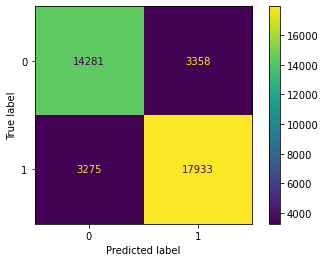

In [83]:
# Display the confusion matrix
disp.plot()

In [84]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.829253
Precision: 0.842281
Recall: 0.845577
F1 Score: 0.843926


## Roc curve

In [85]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  coco)
roc_auc1 = metrics.roc_auc_score(y_test, coco)

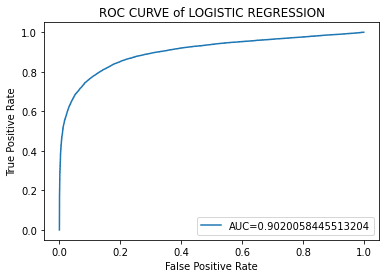

In [86]:
#create ROC curve
plt.plot(f#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  coco)
roc_auc1 = metrics.roc_auc_score(y_test, coco)pr,tpr, label ="AUC="+str(roc_auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE of LOGISTIC REGRESSION')
plt.show()

## average precision score

In [87]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

In [88]:
# Average precision score
from sklearn.metrics import PrecisionRecallDisplay
y_pred1 = clf.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred1)
print(average_precision)

0.930353690163861


In [89]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9303520582626719


Text(0.5, 1.0, 'Logistic Regression Precision-Recall curve: AP=0.93')

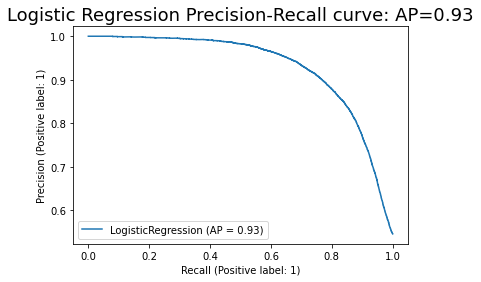

In [90]:
disp1 = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp1.ax_.set_title('Logistic Regression Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size = 18)

## Feature Importance of Logistic Regression

In [91]:
print(clf.coef_)

[[-0.75083999 -0.13411447 -0.40901611 -0.29973858 -0.17080844  0.39223172
  -0.33729508 -0.29293195  0.16791125 -0.13231147  0.97198591  0.142386
   0.32805884  0.41346401  0.30274693  0.10154791  0.36896686  0.07037747
   0.19781139  0.09792304 -0.2822661 ]]


In [94]:
column = X.columns
column

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [96]:
feature_importance = dict(zip(column, clf.coef_[0]))
feature_importance

{'Customer Type': -0.7508399940915393,
 'Age': -0.13411447124093237,
 'Type of Travel': -0.4090161067318956,
 'Class': -0.2997385798239698,
 'Flight Distance': -0.17080843683510114,
 'Seat comfort': 0.3922317208950713,
 'Departure/Arrival time convenient': -0.33729507665123526,
 'Food and drink': -0.2929319530591421,
 'Gate location': 0.16791124984838238,
 'Inflight wifi service': -0.13231147390375633,
 'Inflight entertainment': 0.9719859093834635,
 'Online support': 0.14238599857129022,
 'Ease of Online booking': 0.32805884126956747,
 'On-board service': 0.4134640091615348,
 'Leg room service': 0.3027469340084068,
 'Baggage handling': 0.10154790557300122,
 'Checkin service': 0.36896685520238204,
 'Cleanliness': 0.07037747327859101,
 'Online boarding': 0.19781138976550866,
 'Departure Delay in Minutes': 0.09792303852309954,
 'Arrival Delay in Minutes': -0.28226609617429227}

In [99]:
ab = clf.coef_[0]

#### convert to a list

In [100]:
ab_list = ab.tolist()

In [102]:
lol = pd.DataFrame({'feature_names': column,
                    'feature_importance':ab_list} )

In [105]:
lol.sort_values(by ='feature_importance', ascending = False)

,feature_names,feature_importance
10,Inflight entertainment,0.971986
13,On-board service,0.413464
5,Seat comfort,0.392232
16,Checkin service,0.368967
12,Ease of Online booking,0.328059
14,Leg room service,0.302747
18,Online boarding,0.197811
8,Gate location,0.167911
11,Online support,0.142386
15,Baggage handling,0.101548


In [107]:
feature_imp1 = pd.Series(ab_list, index=column).sort_values(ascending=False)
feature_imp1

Inflight entertainment               0.971986
On-board service                     0.413464
Seat comfort                         0.392232
Checkin service                      0.368967
Ease of Online booking               0.328059
Leg room service                     0.302747
Online boarding                      0.197811
Gate location                        0.167911
Online support                       0.142386
Baggage handling                     0.101548
Departure Delay in Minutes           0.097923
Cleanliness                          0.070377
Inflight wifi service               -0.132311
Age                                 -0.134114
Flight Distance                     -0.170808
Arrival Delay in Minutes            -0.282266
Food and drink                      -0.292932
Class                               -0.299739
Departure/Arrival time convenient   -0.337295
Type of Travel                      -0.409016
Customer Type                       -0.750840
dtype: float64

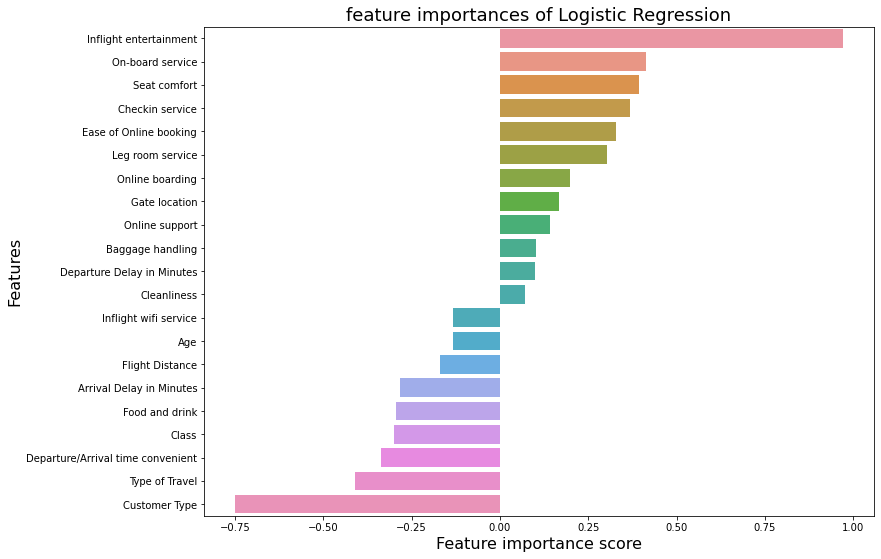

In [111]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x=feature_imp1, y=feature_imp1.index)
ax.set_title("feature importances of Logistic Regression", size = 18)
ax.set_yticklabels(feature_imp1.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()